# Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. 

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the data

In [331]:
df=pd.read_csv('Leads.csv')

In [332]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [333]:
df.shape

(9240, 37)

In [334]:
#information about df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [335]:
#percentage of null values
df.isna().sum()/(len(df))*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

Some columns have really high pecentage of null values.

In [336]:
   df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# 1. Data Preparation and Cleaning

In [337]:
#first we will drop the columns with null values>30%
null=df.isna().sum()/(len(df))*100>30
drop_columns=null[null==True].index

In [338]:
df.drop(drop_columns,axis=1,inplace=True)
df

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,No,No,No,No,Select,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,No,No,No,No,Select,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,No,No,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,No,No,No,No,Select,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,No,No,No,No,Select,Mumbai,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,No,No,No,No,Potential Lead,Mumbai,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,No,No,No,No,Potential Lead,Mumbai,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,No,No,No,No,Potential Lead,Mumbai,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,No,No,No,No,NaN,Other Metro Cities,No,No,SMS Sent


In [339]:
df.shape

(9240, 31)

In [340]:
df.isna().sum()/len(df)

Prospect ID                                      0.000000
Lead Number                                      0.000000
Lead Origin                                      0.000000
Lead Source                                      0.003896
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      0.014827
Total Time Spent on Website                      0.000000
Page Views Per Visit                             0.014827
Last Activity                                    0.011147
Country                                          0.266342
Specialization                                   0.155628
How did you hear about X Education               0.238853
What is your current occupation                  0.291126
What matters most to you in choosing a course    0.293182
Search                                           0.000000
Magazine      

**What is your current occupation, What matters most to you in choosing a course, Lead Profile** also have almost 30% null values. Lets drop them too.

In [341]:
df.drop(['What is your current occupation', 'What matters most to you in choosing a course', 'Lead Profile'],axis=1,inplace=True)
df.shape

(9240, 28)

In [342]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9240 non-null   object 
 1   Lead Number                               9240 non-null   int64  
 2   Lead Origin                               9240 non-null   object 
 3   Lead Source                               9204 non-null   object 
 4   Do Not Email                              9240 non-null   object 
 5   Do Not Call                               9240 non-null   object 
 6   Converted                                 9240 non-null   int64  
 7   TotalVisits                               9103 non-null   float64
 8   Total Time Spent on Website               9240 non-null   int64  
 9   Page Views Per Visit                      9103 non-null   float64
 10  Last Activity                       

**City,Country, Specialization, How did you hear about X Education** still have have high percentage of null values but less than 30%. Lets look into them and find different startegy to hnadle them.

In [343]:
df.City.value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

Looking at the values of ciy column Select is there which means most people never selected the their city.Thus these can be treated as null values or we can put them into in to the categories of Other city.

In [344]:
df.Country.value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In Country columns most of the people are from India, we can fill null values as India.

In [345]:
df.Specialization.value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

Specialzation has high number of select values which are being considered as null values 

In [346]:
df['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

How did you hear about X Education has a very high percentage of select which can be considered as null values and it has very high select values hence it would be better to drop this columns.

In [347]:
# number of null values after considering select as null values in city and specialization.
(df.City.isna().sum()+len(df[df.City=='Select']))/len(df)

0.3970779220779221

There are almost 40% null values in city hence its better to drop this column.

In [348]:
#for specialization
(df.Specialization.isna().sum()+len(df[df.Specialization=='Select']))/len(df)

0.3658008658008658

There are almost 36.5% null values in Specialization hence its better to drop this column.

In [349]:
#dropping City, Specialization and How did you hear about X Education
df.drop(['City', 'Specialization', 'How did you hear about X Education'],axis=1,inplace=True)
df.shape

(9240, 25)

In [350]:
# for country lets impute null values with most occuring value= India
df.Country.fillna('India',inplace=True)

In [351]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9240 non-null   object 
 1   Lead Number                               9240 non-null   int64  
 2   Lead Origin                               9240 non-null   object 
 3   Lead Source                               9204 non-null   object 
 4   Do Not Email                              9240 non-null   object 
 5   Do Not Call                               9240 non-null   object 
 6   Converted                                 9240 non-null   int64  
 7   TotalVisits                               9103 non-null   float64
 8   Total Time Spent on Website               9240 non-null   int64  
 9   Page Views Per Visit                      9103 non-null   float64
 10  Last Activity                       

In [352]:
# rest of the columns have very feww null values hence we will drop those rows
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9074 non-null   object 
 1   Lead Number                               9074 non-null   int64  
 2   Lead Origin                               9074 non-null   object 
 3   Lead Source                               9074 non-null   object 
 4   Do Not Email                              9074 non-null   object 
 5   Do Not Call                               9074 non-null   object 
 6   Converted                                 9074 non-null   int64  
 7   TotalVisits                               9074 non-null   float64
 8   Total Time Spent on Website               9074 non-null   int64  
 9   Page Views Per Visit                      9074 non-null   float64
 10  Last Activity                       

In [353]:
#lets check which other columns have select values
for i in df.columns:
    l=len(df[df[i]=='Select'])
    print(f'{i} - {l}')

Prospect ID - 0
Lead Number - 0
Lead Origin - 0
Lead Source - 0
Do Not Email - 0
Do Not Call - 0
Converted - 0
TotalVisits - 0
Total Time Spent on Website - 0
Page Views Per Visit - 0
Last Activity - 0
Country - 0
Search - 0
Magazine - 0
Newspaper Article - 0
X Education Forums - 0
Newspaper - 0
Digital Advertisement - 0
Through Recommendations - 0
Receive More Updates About Our Courses - 0
Update me on Supply Chain Content - 0
Get updates on DM Content - 0
I agree to pay the amount through cheque - 0
A free copy of Mastering The Interview - 0
Last Notable Activity - 0


It seems no other COlumns have Select values hence we are ready to  move ahead.

# 2. EDA

The target variable is **Converted**and all the eda will be concenterated around it

In [354]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,No,No,No,No,Modified


In [355]:
# lets get a list of columns which are categorical
lst=[]
for i in df.columns:
    if df[i].dtype=='O':
        lst.append(i)
lst

['Prospect ID',
 'Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [356]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000
mean,617032.619352,0.378554,3.456028,482.887481,2.370151
std,23348.029512,0.485053,4.858802,545.256560,2.160871
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596406.000000,0.000000,1.000000,11.000000,1.000000
50%,615278.500000,0.000000,3.000000,246.000000,2.000000
75%,637176.500000,1.000000,5.000000,922.750000,3.200000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


### 1. Coverted

In [357]:
df.Converted.value_counts()

0    5639
1    3435
Name: Converted, dtype: int64

<AxesSubplot:ylabel='Converted'>

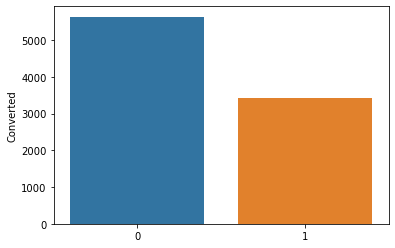

In [358]:
sns.barplot(x=['0','1'],y=df.Converted.value_counts())

In [359]:
# getting df with different values for Converted
df0=df[df.Converted==0]
df1=df[df.Converted==1]

## 2. Lead Origin vs Converted

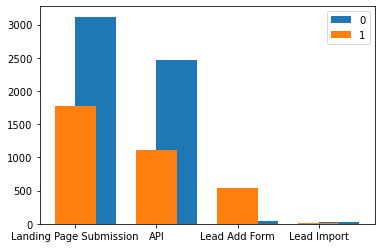

In [360]:
plt.bar(df0['Lead Origin'].value_counts().index,df0['Lead Origin'].value_counts(),label='0',align='edge',width=0.5)
plt.bar(df1['Lead Origin'].value_counts().index,df1['Lead Origin'].value_counts(),label='1',width=0.5)
plt.legend()

## 3. Lead Source vs Converted

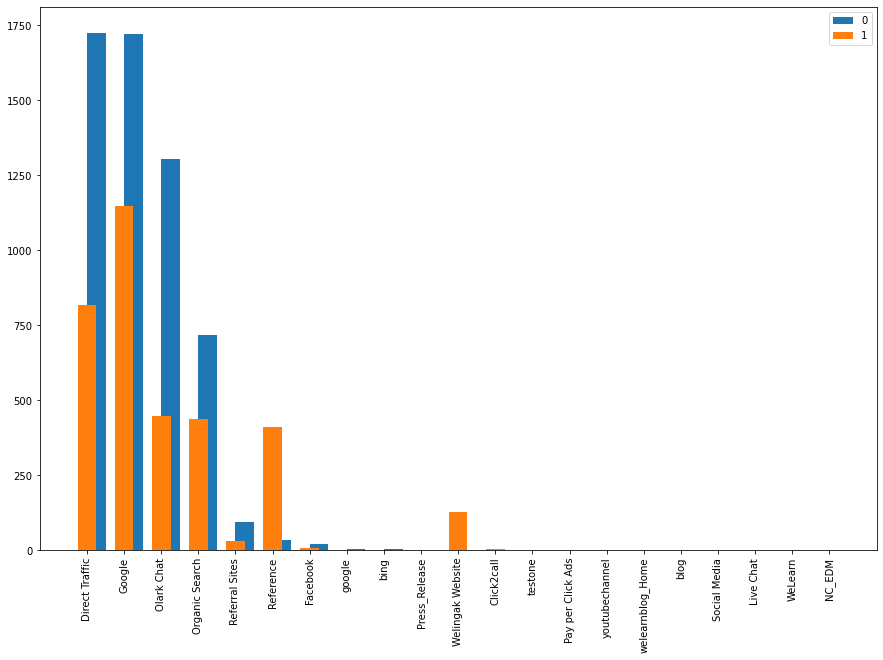

In [361]:
plt.figure(figsize=(15,10))
plt.bar(df0['Lead Source'].value_counts().index,df0['Lead Source'].value_counts(),label='0',align='edge',width=0.5)
plt.bar(df1['Lead Source'].value_counts().index,df1['Lead Source'].value_counts(),label='1',width=0.5)
plt.xticks(rotation=90)
plt.legend()

## 4. Do Not email vs converted

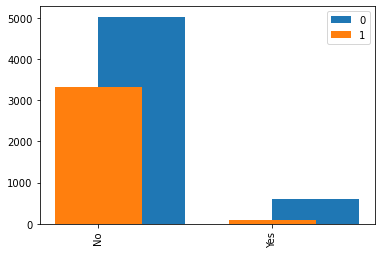

In [362]:
## 4. Do Not email vs converted
plt.bar(df0['Do Not Email'].value_counts().index,df0['Do Not Email'].value_counts(),label='0',align='edge',width=0.5)
plt.bar(df1['Do Not Email'].value_counts().index,df1['Do Not Email'].value_counts(),label='1',width=0.5)
plt.xticks(rotation=90)
plt.legend()

## 5. Do Not Call vs Converted

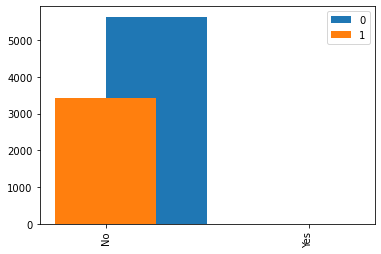

In [363]:

plt.bar(df0['Do Not Call'].value_counts().index,df0['Do Not Call'].value_counts(),label='0',align='edge',width=0.5)
plt.bar(df1['Do Not Call'].value_counts().index,df1['Do Not Call'].value_counts(),label='1',width=0.5)
plt.xticks(rotation=90)
plt.legend()

## 6. Last Activity vs Converted

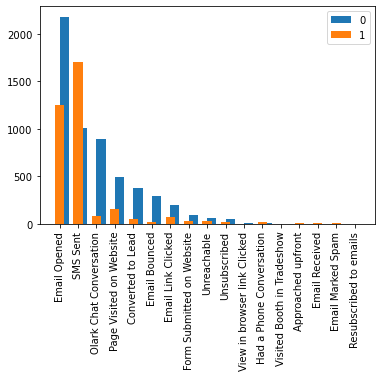

In [364]:
plt.bar(df0['Last Activity'].value_counts().index,df0['Last Activity'].value_counts(),label='0',align='edge',width=0.5)
plt.bar(df1['Last Activity'].value_counts().index,df1['Last Activity'].value_counts(),label='1',width=0.5)
plt.xticks(rotation=90)
plt.legend()

## 7. Receive More Updates About Our Courses vs Converted

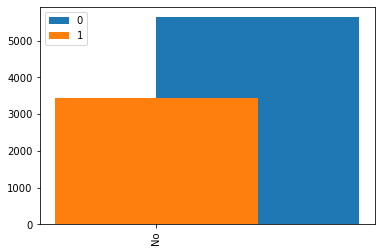

In [365]:
plt.bar(df0['Receive More Updates About Our Courses'].value_counts().index,df0['Receive More Updates About Our Courses'].value_counts(),label='0',align='edge',width=0.5)
plt.bar(df1['Receive More Updates About Our Courses'].value_counts().index,df1['Receive More Updates About Our Courses'].value_counts(),label='1',width=0.5)
plt.xticks(rotation=90)
plt.legend()

## 8. I agree to pay the amount through cheque vs Converted

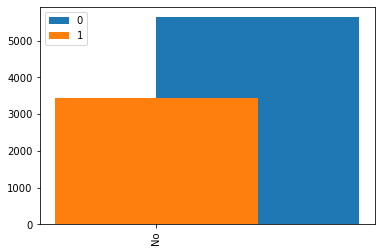

In [366]:
plt.bar(df0['I agree to pay the amount through cheque'].value_counts().index,df0['I agree to pay the amount through cheque'].value_counts(),label='0',align='edge',width=0.5)
plt.bar(df1['I agree to pay the amount through cheque'].value_counts().index,df1['I agree to pay the amount through cheque'].value_counts(),label='1',width=0.5)
plt.xticks(rotation=90)
plt.legend()

## 9. A free copy of Mastering The Interview vs Converted

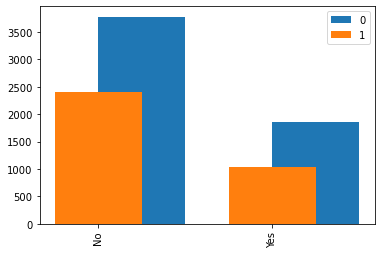

In [367]:
plt.bar(df0['A free copy of Mastering The Interview'].value_counts().index,df0['A free copy of Mastering The Interview'].value_counts(),label='0',align='edge',width=0.5)
plt.bar(df1['A free copy of Mastering The Interview'].value_counts().index,df1['A free copy of Mastering The Interview'].value_counts(),label='1',width=0.5)
plt.xticks(rotation=90)
plt.legend()

# 3. Creating dummies for categorical columns

In [368]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,No,No,No,No,Modified


Most of the Columns are binary hence can be replaced by 0 and 1.

In [369]:
#list of binary columns
lst1=[]
for i in df.columns:
    if len(df[i].unique())<=2 and df[i].dtype=='O':
        lst1.append(i) 
lst1

['Do Not Email',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview']

In [370]:
df[lst1]=df[lst1].replace({'No':0,'Yes':1})

In [371]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,0,0,0,0,0,0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,0,0,0,0,0,0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,0,0,0,0,0,0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,0,0,0,0,0,0,0,0,Modified


In [372]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9074 non-null   object 
 1   Lead Number                               9074 non-null   int64  
 2   Lead Origin                               9074 non-null   object 
 3   Lead Source                               9074 non-null   object 
 4   Do Not Email                              9074 non-null   int64  
 5   Do Not Call                               9074 non-null   int64  
 6   Converted                                 9074 non-null   int64  
 7   TotalVisits                               9074 non-null   float64
 8   Total Time Spent on Website               9074 non-null   int64  
 9   Page Views Per Visit                      9074 non-null   float64
 10  Last Activity                       

In [373]:
# getting list of categorical columns having more than 2 categories
lst2=[]
for i in df.columns:
    if len(df[i].unique())>2 and df[i].dtype=='O':
        lst2.append(i) 
lst2

['Prospect ID',
 'Lead Origin',
 'Lead Source',
 'Last Activity',
 'Country',
 'Last Notable Activity']

Prospect id and lead number are identitification columns hence we can leave them. rest all will have dummies made

In [374]:
lst2=lst2[1:]
lst2

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Country',
 'Last Notable Activity']

In [375]:
df.reset_index(drop=True,inplace=True)

In [376]:
#creating dummy columns for multicategorical columns
for i in lst2:
    d=pd.get_dummies(df[i])
    df[d.columns]=d
    df.drop(i,axis=1,inplace=True)

While using get_dummies, rop first is not being used as for more explanation during the modelling

In [377]:
df.head()

,Prospect ID,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,...,Sweden,Switzerland,Tanzania,Uganda,United Arab Emirates,United Kingdom,United States,Vietnam,unknown,Modified
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0,0.0,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,0,5.0,674,2.5,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,0,1,2.0,1532,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,0,1.0,305,1.0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,0,1,2.0,1428,1.0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [378]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9074 entries, 0 to 9073
Columns: 101 entries, Prospect ID to Modified
dtypes: float64(2), int64(17), object(1), uint8(81)
memory usage: 2.1+ MB


For model training the columns prospect id and lead number are useless as tehy are tjust identifications hence we will drop them.

In [380]:
df.drop(['Prospect ID','Lead Number'],inplace=True,axis=1)

In [381]:
df.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,...,Sweden,Switzerland,Tanzania,Uganda,United Arab Emirates,United Kingdom,United States,Vietnam,unknown,Modified
0,0,0,0,0.0,0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,5.0,674,2.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,2.0,1532,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1.0,305,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,1,2.0,1428,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## Dividing into train and test data frames 

In [382]:
X=df.drop('Converted',axis=1)
y=df.Converted

In [383]:
from sklearn.model_selection import train_test_split

In [388]:
np.random.seed(0)
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2)

In [389]:
Xtrain.shape,ytrain.shape,Xtest.shape,ytest.shape

((7259, 98), (7259,), (1815, 98), (1815,))

## Scaling the data using MinMaxScaler

In [390]:
from sklearn.preprocessing import MinMaxScaler

In [394]:
scaler=MinMaxScaler()
Xtrain=scaler.fit_transform(X=Xtrain)
Xtest=scaler.transform(Xtest)

# 4. Modelling

In [395]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [403]:
model=LogisticRegression(max_iter=1000,n_jobs=-1)
#running rfe with number of features=20 for selecting important features
rfe=RFE(estimator=model,n_features_to_select=20)

In [404]:
rfe.fit(Xtrain,ytrain)

RFE(estimator=LogisticRegression(max_iter=1000, n_jobs=-1),
    n_features_to_select=20)

In [415]:
df=pd.DataFrame(list(zip(X.columns, rfe.support_, rfe.ranking_)))

In [414]:
#columns selcted by rfe
col_selected=X.columns[rfe.support_]

In [418]:
df[df[1]==1].sort_values(2)

,0,1,2
0,Do Not Email,True,1
78,Netherlands,True,1
73,Italy,True,1
61,Bahrain,True,1
56,Unsubscribed,True,1
55,Unreachable,True,1
54,SMS Sent,True,1
51,Olark Chat Conversation,True,1
50,Had a Phone Conversation,True,1
35,Welingak Website,True,1


In [422]:
Xtrain=pd.DataFrame(Xtrain,columns=X.columns)

In [423]:
Xtrain.shape

(7259, 98)

In [424]:
Xtrain=Xtrain[col_selected]

In [426]:
Xtest=pd.DataFrame(Xtest,columns=X.columns)
Xtest=Xtest[col_selected]

In [427]:
model.fit(Xtrain,ytrain)

LogisticRegression(max_iter=1000, n_jobs=-1)

In [430]:
#accuracy score of model
model.score(Xtrain,ytrain)

0.7900537264085963

In [436]:
from sklearn.metrics import recall_score,precision_score,roc_auc_score

In [432]:
train_pred=model.predict(Xtrain)

In [437]:
recall_score(ytrain,train_pred), precision_score(ytrain,train_pred),roc_auc_score(ytrain,train_pred)

(0.6672604203776273, 0.76045473000406, 0.7673678561906105)

# predicting on test data

In [440]:
test_pred=model.predict(Xtest)

In [439]:
model.score(Xtrain,ytrain)

0.7900537264085963

In [442]:
recall_score(ytest,test_pred), precision_score(ytest,test_pred), roc_auc_score(ytest,test_pred)

(0.6878980891719745, 0.7646017699115044, 0.787925455706459)

Model is performing well


In [ ]:
##### Prepared by #####


  # TARUN SHARMA #